<a href="https://colab.research.google.com/github/dataemperor/Shrimple/blob/shaithra/Shrimple_dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 2. Load the Dataset

In [2]:
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Shrimple Dataset/Dataset Shrimple2.xlsx'

# Load the dataset
df = pd.read_excel(file_path)


# 3. Explore the Data

In [3]:
# Display the first few rows
print(df.head())

# Check for missing values and data types
print(df.info())

# Summary statistics
print(df.describe())

# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check for missing values
print(f"\nMissing values in each column:\n{df.isnull().sum()}")

# Check the data types of each column
print(f"\nData types of each column:\n{df.dtypes}")

# Summary statistics for numerical columns
print(f"\nSummary statistics for numerical columns:\n{df.describe()}") #Computes summary statistics for all numerical columns in the dataset.
# Provides an overview of numerical data distribution and identifies anomalies (e.g., extreme outliers).

# Check the distribution of the target variable
print(f"\nDistribution of the target variable:\n{df['Status'].value_counts()}")




        Date PondID  DOC   ph  Salinity  Transparency  Alkalinity     Status
0 2024-10-12    H01  NaN  8.4      10.0          50.0       102.0  Breedable
1 2024-10-12    A01  NaN  8.5      14.0          45.0        85.0  Breedable
2 2024-10-12    A02  NaN  8.5      10.0          45.0        68.0  Breedable
3 2024-10-13    H01  NaN  8.5       9.0          50.0       119.0  Breedable
4 2024-10-13    A01  NaN  8.6      14.0          50.0       102.0  Breedable
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          646 non-null    datetime64[ns]
 1   PondID        646 non-null    object        
 2   DOC           527 non-null    float64       
 3   ph            621 non-null    float64       
 4   Salinity      646 non-null    float64       
 5   Transparency  639 non-null    float64       
 6   Alkalinity    403 non-null   

### Observations
1. **Data Summary:**
   - **DOC, Transparency, Alkalinity:** Have missing values (DOC: 119 missing, Transparency: 7 missing, Alkalinity: 136 missing). These need to be handled.
   - **`ph` and `Alkalinity`:** Are stored as `object` but should likely be numerical.
   - **Target Variable `Status`:** The dataset is imbalanced (346 "Breedable" vs. 70 "Unbreedable"). Imbalanced classes may affect model training and evaluation.

2. **Numerical Data Distribution:**
   - **DOC:** Mean is 30.93, with a wide range (2 to 66). Missing values need to be addressed carefully.
   - **Salinity:** Mean is 25.99, but outliers are evident (max is 120). These need further investigation.
   - **Transparency:** Relatively consistent, but outliers exist (minimum is 0.1).
   - **Date:** The data spans from October 2024 to February 2025, which seems fine.

3. **Potential Data Issues:**
   - Missing data in key columns (e.g., `DOC`, `Transparency`, `Alkalinity`).
   - Outliers in numerical columns like `Salinity` and `Transparency`.
   - Data type mismatches (`ph` and `Alkalinity` as objects).
   - Imbalanced target variable `Status`.


Visualizations to Include in EDA

1.Distribution of Numerical Features

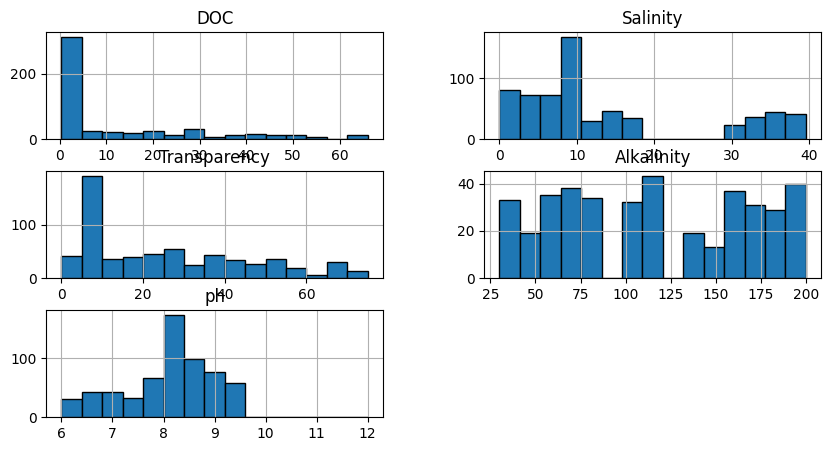

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#Use histograms or boxplots to understand the distributions of features like DOC, Salinity, and Transparency

# Histogram
df[['DOC', 'Salinity', 'Transparency','Alkalinity','ph']].hist(bins=15, figsize=(10, 5), edgecolor='black')
plt.show()



2. Correlation Heatmap

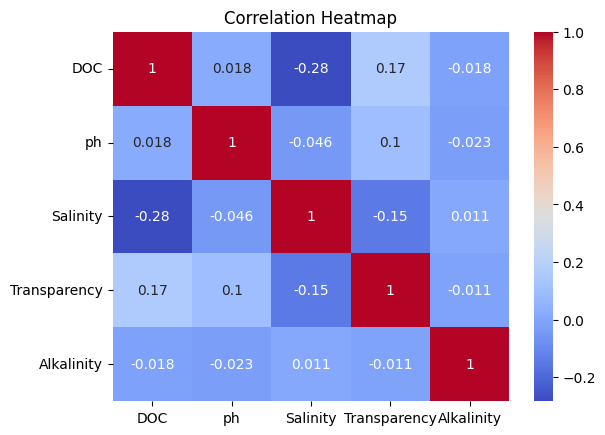

In [5]:
#Check correlations between numerical features to identify relationships.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation and plot heatmap
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




3. Target Variable Distribution

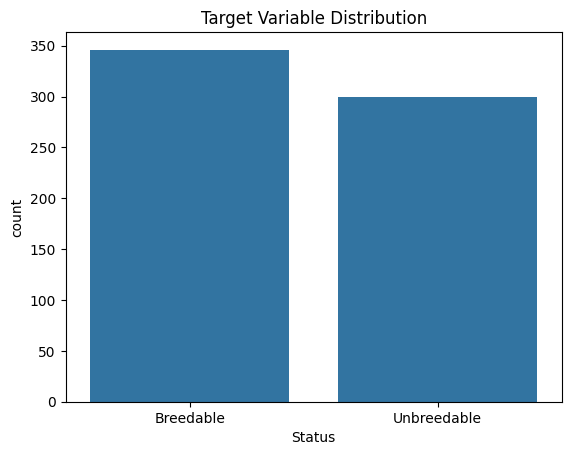

In [6]:
sns.countplot(x='Status', data=df)
plt.title("Target Variable Distribution")
plt.show()


4. Trend Analysis (Date Feature)

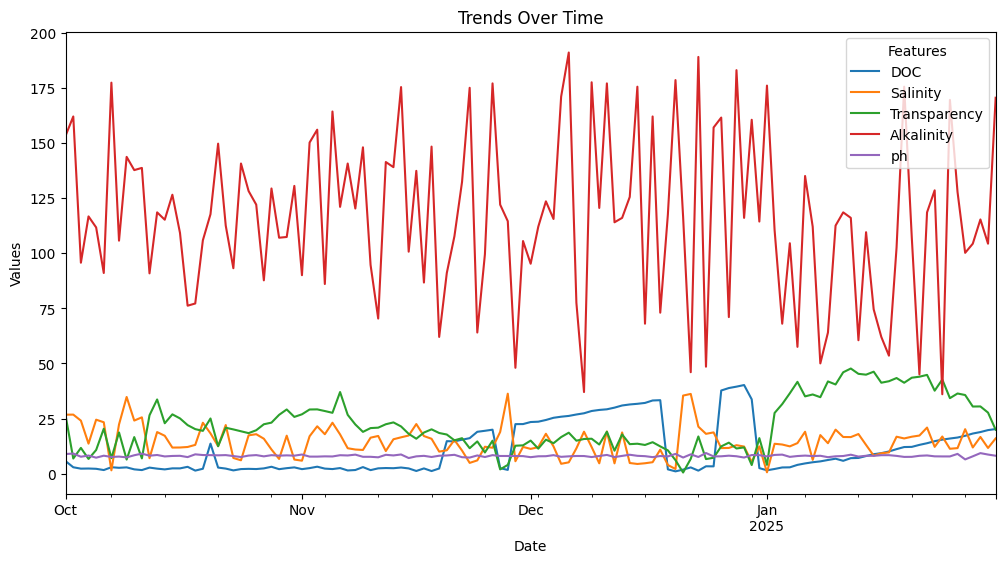

In [7]:
#Plot trends over time for features like DOC, Salinity, or Transparency

# Group by date and calculate the mean for numerical columns
df_grouped = df.groupby('Date').mean(numeric_only=True)

# Plot trends for selected features
df_grouped[['DOC', 'Salinity', 'Transparency','Alkalinity','ph']].plot(figsize=(12, 6))
plt.title("Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(title="Features")
plt.show()



5. Relationship Between Variables

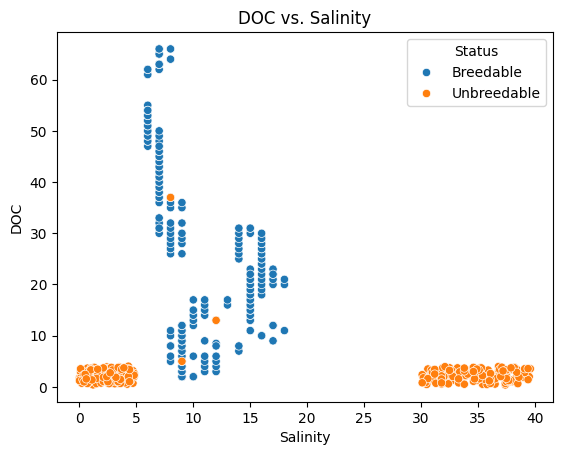

In [8]:
#Use scatter plots to understand relationships between features (e.g., DOC vs. Transparency or Salinity vs. ph)

sns.scatterplot(x='Salinity', y='DOC', hue='Status', data=df)
plt.title("DOC vs. Salinity")
plt.show()


6. Outlier Visualization

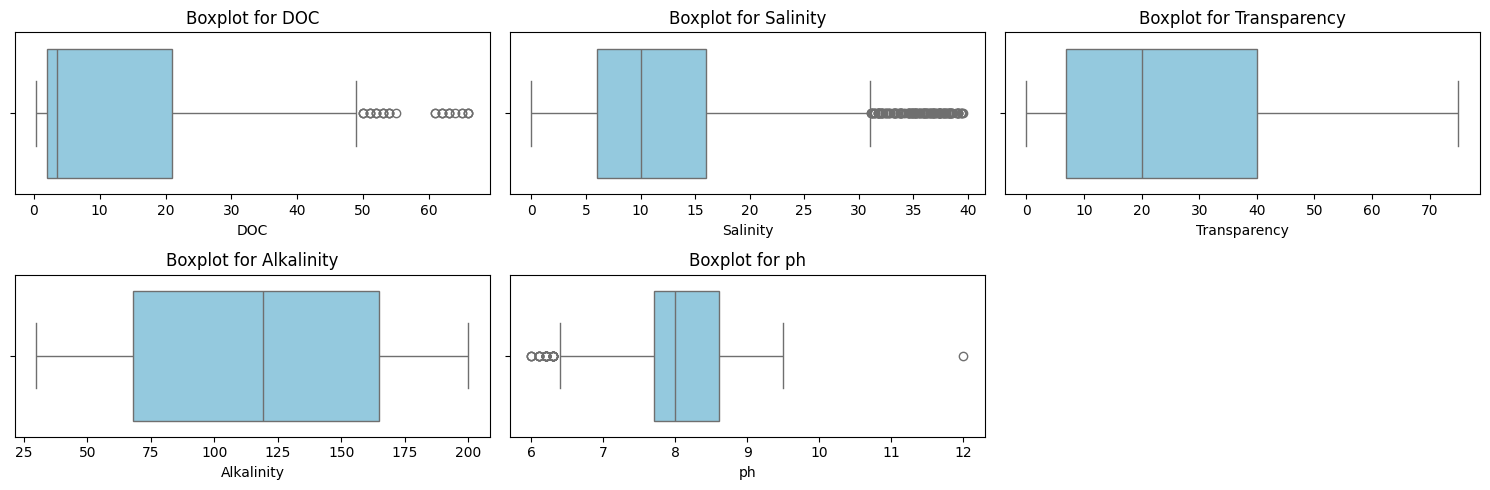

In [9]:
#Boxplots are great for spotting outliers in numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for numerical features
plt.figure(figsize=(15, 5))  # Set the figure size for better visualization
for i, col in enumerate(['DOC', 'Salinity', 'Transparency','Alkalinity','ph'], 1):  # Fix enumerate usage
    plt.subplot(2, 3, i)  # Create subplots in a single row
    sns.boxplot(x=df[col], color='skyblue')  # Boxplot for each column
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)  # Add x-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



1. **Boxplots**  
   - This is a boxplot visualization comparing the distributions of the three variables.
   - **DOC** and **Transparency** have relatively wide interquartile ranges (IQR), meaning their values are spread out.
   - **Salinity** has a narrow IQR but has significant **outliers** on the higher end (values beyond 80).
   - The presence of outliers in Salinity suggests a **skewed distribution**.

2. **Histograms**  
   - This set of histograms provides more detail on the frequency distributions of the variables.
   - **DOC** has a roughly uniform distribution with no significant skew.
   - **Salinity** is highly skewed, with most values concentrated around a low range (~10-20) but some extreme outliers at **higher values (~80-120)**.
   - **Transparency** shows a multimodal distribution, meaning it has multiple peaks.

### Insights:
- The combination of the **boxplot and histograms** shows that **Salinity has extreme outliers**, while **DOC and Transparency are more evenly spread**.
- Transparency might represent different environmental conditions due to its **multiple peaks**.
- Salinity's skewness and outliers indicate **potential anomalies or significant variations in water conditions**.

# 5. Preprocess Data

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Function to impute using mode within each status group
def mode_imputation(group):
    imputer = SimpleImputer(strategy='most_frequent')
    group[['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity']] = imputer.fit_transform(group[['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity']])
    return group

# Apply the function to each group separately
df = df.groupby('Status', group_keys=False).apply(mode_imputation)

# Verify the changes
print(df.info())
print(df.head())




<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 0 to 645
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          646 non-null    datetime64[ns]
 1   PondID        646 non-null    object        
 2   DOC           646 non-null    float64       
 3   ph            646 non-null    float64       
 4   Salinity      646 non-null    float64       
 5   Transparency  646 non-null    float64       
 6   Alkalinity    646 non-null    float64       
 7   Status        646 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 45.4+ KB
None
        Date PondID   DOC   ph  Salinity  Transparency  Alkalinity     Status
0 2024-10-12    H01  15.0  8.4      10.0          50.0       102.0  Breedable
1 2024-10-12    A01  15.0  8.5      14.0          45.0        85.0  Breedable
2 2024-10-12    A02  15.0  8.5      10.0          45.0        68.0  Breedable
3 2024-10-13

<ipython-input-10-11f1c8ef94a2>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Status', group_keys=False).apply(mode_imputation)


Standadization code

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Function to impute using mode within each status group
def mode_imputation(group):
    imputer = SimpleImputer(strategy='most_frequent')
    group[['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity']] = imputer.fit_transform(group[['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity']])
    return group

# Apply the function to each group separately
df = df.groupby('Status', group_keys=False).apply(mode_imputation)

# Separate breedable and unbreedable data
breedable_df = df[df['Status'] == 'Breedable'].copy()
unbreedable_df = df[df['Status'] == 'Unbreedable'].copy()

# Features to normalize
features = ['DOC', 'ph', 'Salinity', 'Transparency', 'Alkalinity']

# Normalize breedable data separately
scaler_breedable = MinMaxScaler()
breedable_df[features] = scaler_breedable.fit_transform(breedable_df[features])

# Normalize unbreedable data separately
scaler_unbreedable = MinMaxScaler()
unbreedable_df[features] = scaler_unbreedable.fit_transform(unbreedable_df[features])

# Merge back, maintaining the original status groups
df = pd.concat([breedable_df, unbreedable_df]).reset_index(drop=True)

print("Mode imputation and separate normalization completed.")


Boxplot after pre processing

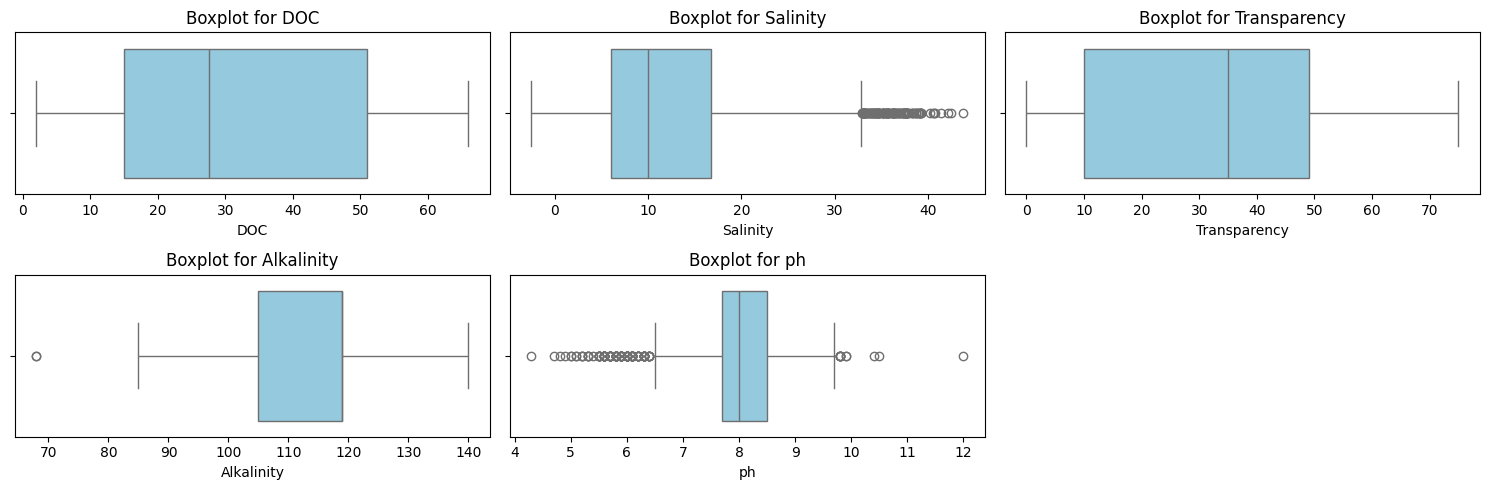

In [ ]:
#Boxplots are great for spotting outliers in numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for numerical features
plt.figure(figsize=(15, 5))  # Set the figure size for better visualization
for i, col in enumerate(['DOC', 'Salinity', 'Transparency','Alkalinity','ph'], 1):  # Fix enumerate usage
    plt.subplot(2, 3, i)  # Create subplots in a single row
    sns.boxplot(x=df[col], color='skyblue')  # Boxplot for each column
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)  # Add x-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()




# 6. Model Building

Fitting 3 folds for each of 36 candidates, totalling 108 fits

Random Forest Best Model
Training Accuracy: 1.0
Test Accuracy: 0.9846153846153847
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.99      0.99      0.99        84

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130

Random Forest Model
Accuracy: 0.9846153846153847
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.99      0.99      0.99        84

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130

Random Forest Confusion Matrix:
[[45  1]
 [ 1 83]]


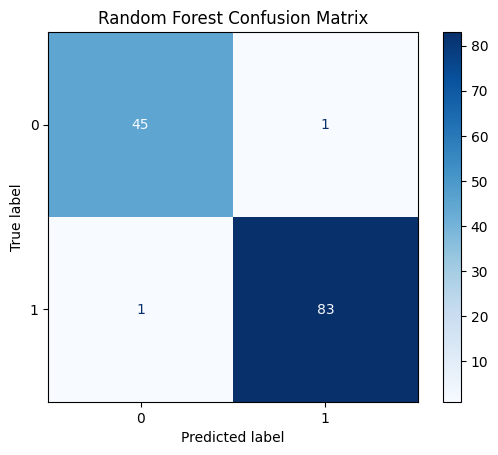

Fitting 3 folds for each of 27 candidates, totalling 81 fits

Gradient Boosting Best Model
Training Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        84

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Gradient Boosting Best Model
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        84

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Gradient Boosting Confusion Matrix:
[[46  0]
 [ 0 84]]


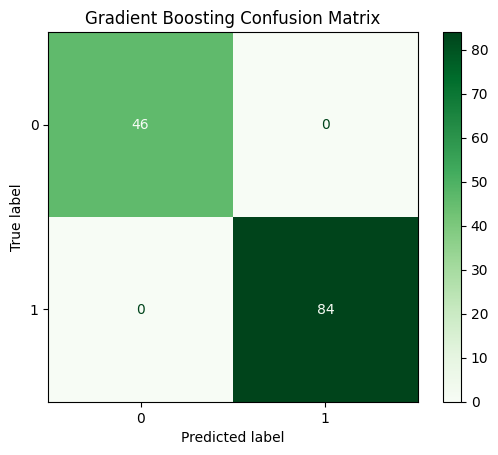

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Drop unnecessary columns
X = df.drop(['Date', 'PondID', 'Status'], axis=1)
y = df['Status']

# Convert labels to numeric
y = y.map({'Breedable': 1, 'Unbreedable': 0})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search for Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate Random Forest
rf_train_predictions = best_rf.predict(X_train)  # Training predictions
rf_test_predictions = best_rf.predict(X_test)    # Test predictions

print("\nRandom Forest Model")
print("Training Accuracy:", accuracy_score(y_train, rf_train_predictions))
print("Test Accuracy:", accuracy_score(y_test, rf_test_predictions))
print(classification_report(y_test, rf_test_predictions))

# Evaluate Random Forest
rf_predictions = best_rf.predict(X_test)
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Print Random Forest Confusion Matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Random Forest Confusion Matrix (Visual)
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Define parameter grid for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Perform grid search for Gradient Boosting
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

# Evaluate Gradient Boosting
gb_train_predictions = best_gb.predict(X_train)  # Training predictions
gb_test_predictions = best_gb.predict(X_test)    # Test predictions

print("\nGradient Boosting Model")
print("Training Accuracy:", accuracy_score(y_train, gb_train_predictions))
print("Test Accuracy:", accuracy_score(y_test, gb_test_predictions))
print(classification_report(y_test, gb_test_predictions))

# Evaluate Gradient Boosting
gb_predictions = best_gb.predict(X_test)
print("Gradient Boosting Model")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

# Print Gradient Boosting Confusion Matrix
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))

# Gradient Boosting Confusion Matrix (Visual)
ConfusionMatrixDisplay.from_estimator(best_gb, X_test, y_test, cmap='Greens')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


In [ ]:
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
test_acc = accuracy_score(y_test, rf_predictions)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 1.0000
Test Accuracy: 0.9846


Based on the accuracies you provided:

- **Train Accuracy: 1.0000**
- **Test Accuracy: 0.9846**

The gap between the train and test accuracy is **only 1.54%**, which is **not very large**. This suggests that **overfitting** might not be a significant concern here.

# Add Confidence Scores to Predictions

In [ ]:
rf_probabilities = best_rf.predict_proba(X_test)  # Get class probabilities
rf_confidence = rf_probabilities.max(axis=1)  # Take max probability as confidence score
rf_predictions = best_rf.predict(X_test)

# Convert confidence to percentage
rf_confidence = (rf_confidence * 100).round(2)

# Display results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_predictions,
    'Confidence (%)': rf_confidence
})

print(results_df.head(10))  # Show first 10 predictions with confidence scores


     Actual  Predicted  Confidence (%)
633       0          0           99.88
367       0          0          100.00
338       1          1           95.58
292       1          1           92.57
72        1          1           97.81
436       0          0           94.84
598       0          0           99.93
616       0          0           99.93
512       0          0           92.05
174       1          0           72.17


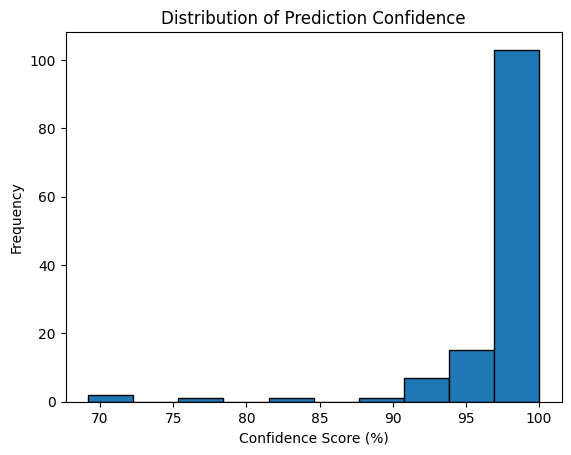

In [ ]:
import matplotlib.pyplot as plt

confidences = results_df["Confidence (%)"]
plt.hist(confidences, bins=10, edgecolor='black')
plt.xlabel("Confidence Score (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Confidence")
plt.show()


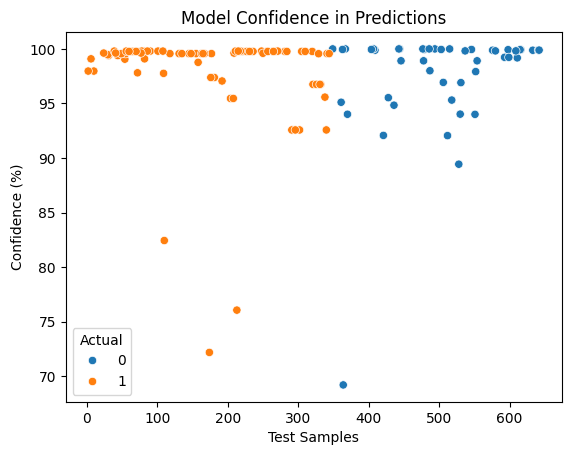

In [ ]:
import seaborn as sns

sns.scatterplot(x=results_df.index, y=results_df["Confidence (%)"], hue=results_df["Actual"])
plt.xlabel("Test Samples")
plt.ylabel("Confidence (%)")
plt.title("Model Confidence in Predictions")
plt.show()


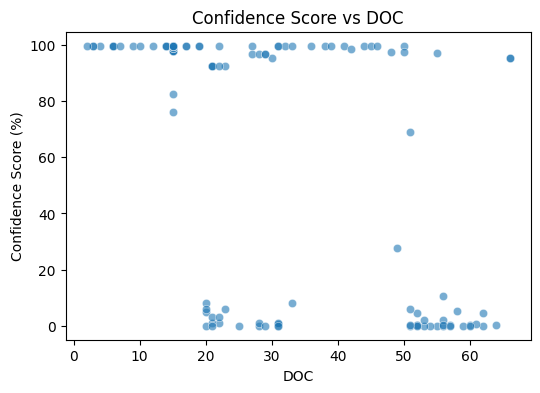

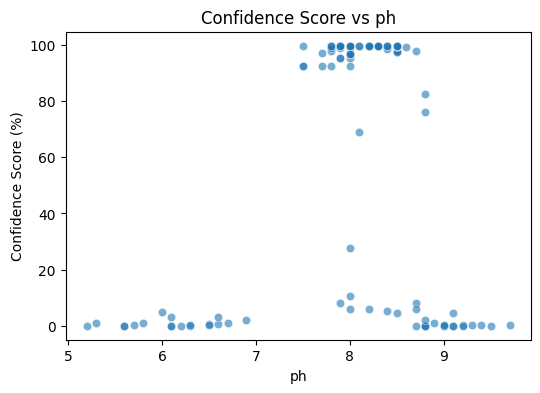

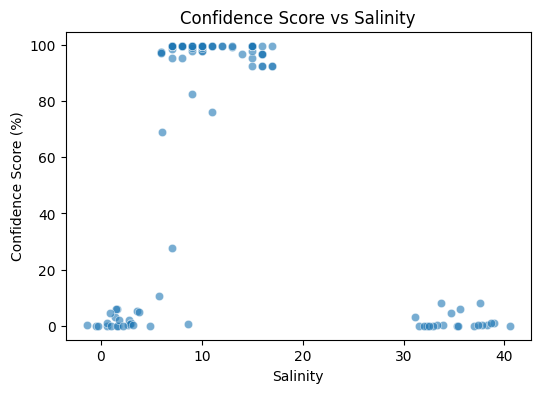

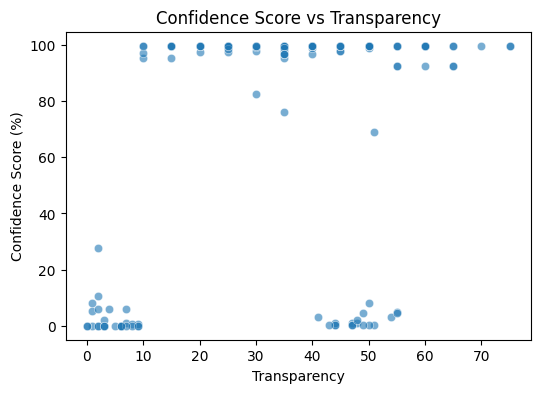

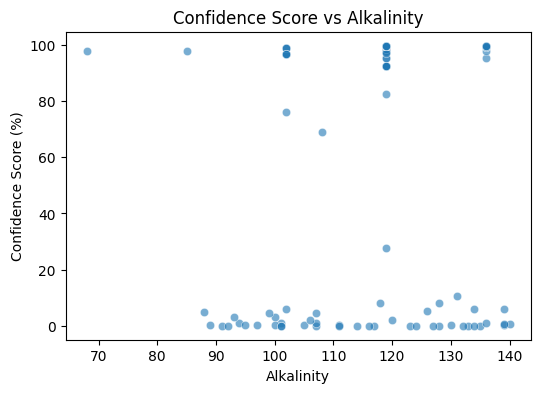

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_test' is your test dataset and 'confidence_scores' are stored
confidence_scores = best_rf.predict_proba(X_test)[:, 1] * 100  # Confidence for class 1 (Breedable)

# Add confidence scores to a new DataFrame for analysis
feature_conf_df = X_test.copy()
feature_conf_df['Confidence (%)'] = confidence_scores

# Plot confidence vs. each feature
for feature in X_test.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature_conf_df[feature], y=feature_conf_df["Confidence (%)"], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Confidence Score (%)")
    plt.title(f"Confidence Score vs {feature}")
    plt.show()


<ipython-input-17-1024870afb5c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


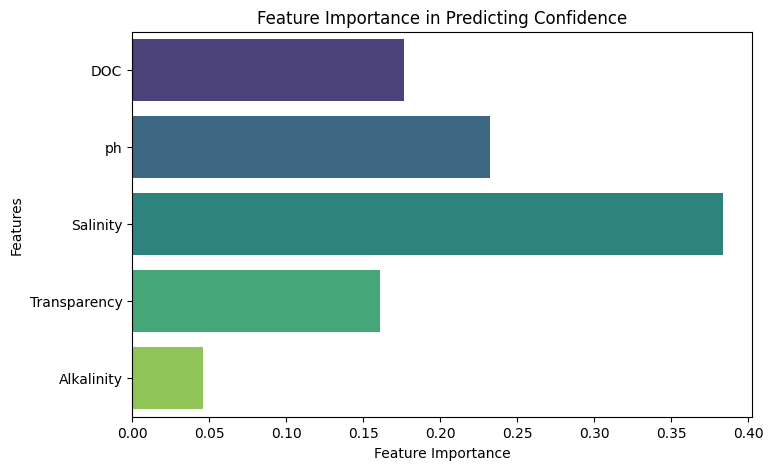

In [ ]:
import numpy as np

# Get feature importances from the trained model
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create heatmap
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Confidence")
plt.show()


# 7. Cross Validation

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


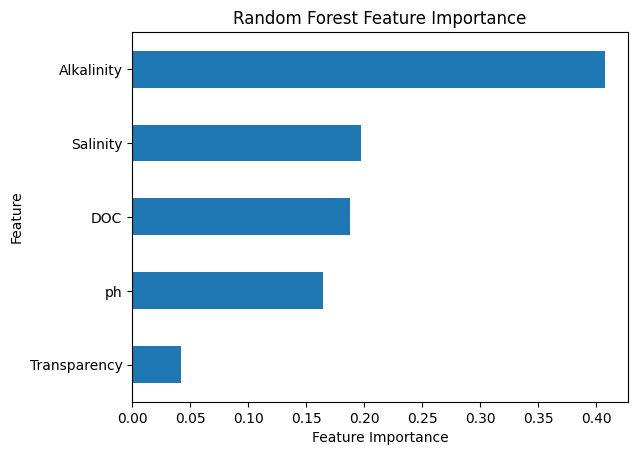

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Assuming your dataset is already preprocessed and stored in 'df'
# Exclude the 'Date' and 'PondID' columns from the features
X = df.drop(['Date', 'PondID', 'Status'], axis=1)
y = df['Status']

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the model to compute feature importance
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


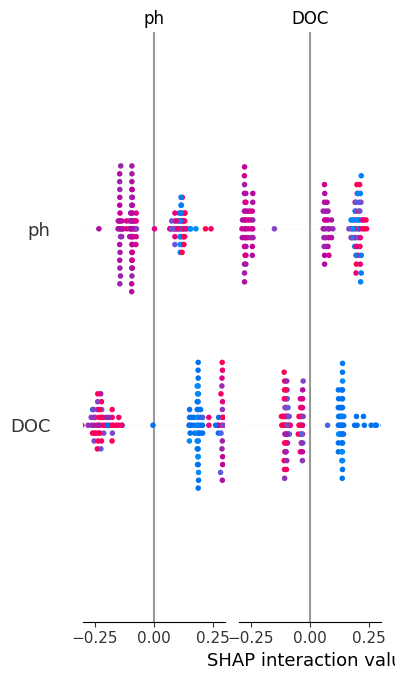

In [ ]:
import shap
import matplotlib.pyplot as plt

# Fit the model again (if necessary)
rf_model.fit(X_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot the feature importance based on SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
import pandas as pd

# Assuming your dataset is already preprocessed and stored in 'df'
# Save the processed DataFrame to an Excel file
df.to_excel('processed_dataset.xlsx', index=False)

# Now, you can download the 'processed_dataset.xlsx' file from your working directory
from IPython.display import HTML
import base64

def create_download_link(df, title="Download Excel file", filename="processed_dataset.xlsx"):
    # Save the DataFrame to an Excel file
    df.to_excel(filename, index=False)

    # Read the Excel file content and convert to base64
    with open(filename, "rb") as f:
        data = f.read()
    b64 = base64.b64encode(data).decode()

    # Create a download link
    href = f'<a href="data:application/octet-stream;base64,{b64}" download="{filename}">{title}</a>'
    return HTML(href)

# Generate and display the download link
create_download_link(df)


# Downloading the trained Random Forest model

In [ ]:
import joblib

# Save the Random Forest model to a file
joblib.dump(best_rf, 'random_forest_model.pkl')

from google.colab import files

# Download the file
files.download('random_forest_model.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>